<a href="https://colab.research.google.com/github/akankshakusf/Deep-Learning-Projects/blob/master/Tensor%20Flow%20-Linear%20Regression/Linear_Regression_for_Predicting_Price_of_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [174]:
#import packages

##data manipulation
import tensorflow as tf
import numpy as np
import pandas as pd
##data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#tensorflow packages
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Preparation**

In [176]:
data = pd.read_csv("/content/drive/MyDrive/train.csv", sep= ",")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [178]:
data.shape

(1000, 12)

In [179]:
#column names
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [180]:
#drop irrelavent columns
data=data.drop(columns=['v.id', 'on road old', 'on road now'], axis=1)
data.head()

,years,km,rating,condition,economy,top speed,hp,torque,current price
0,3,78945,1,2,14,177,73,123,351318.0
1,6,117220,5,9,9,148,74,95,285001.5
2,2,132538,2,8,15,181,53,97,215386.0
3,4,101065,4,3,11,197,54,116,244295.5
4,6,61559,3,9,12,160,53,105,531114.5


#### Visualize data

<Figure size 500x400 with 0 Axes>

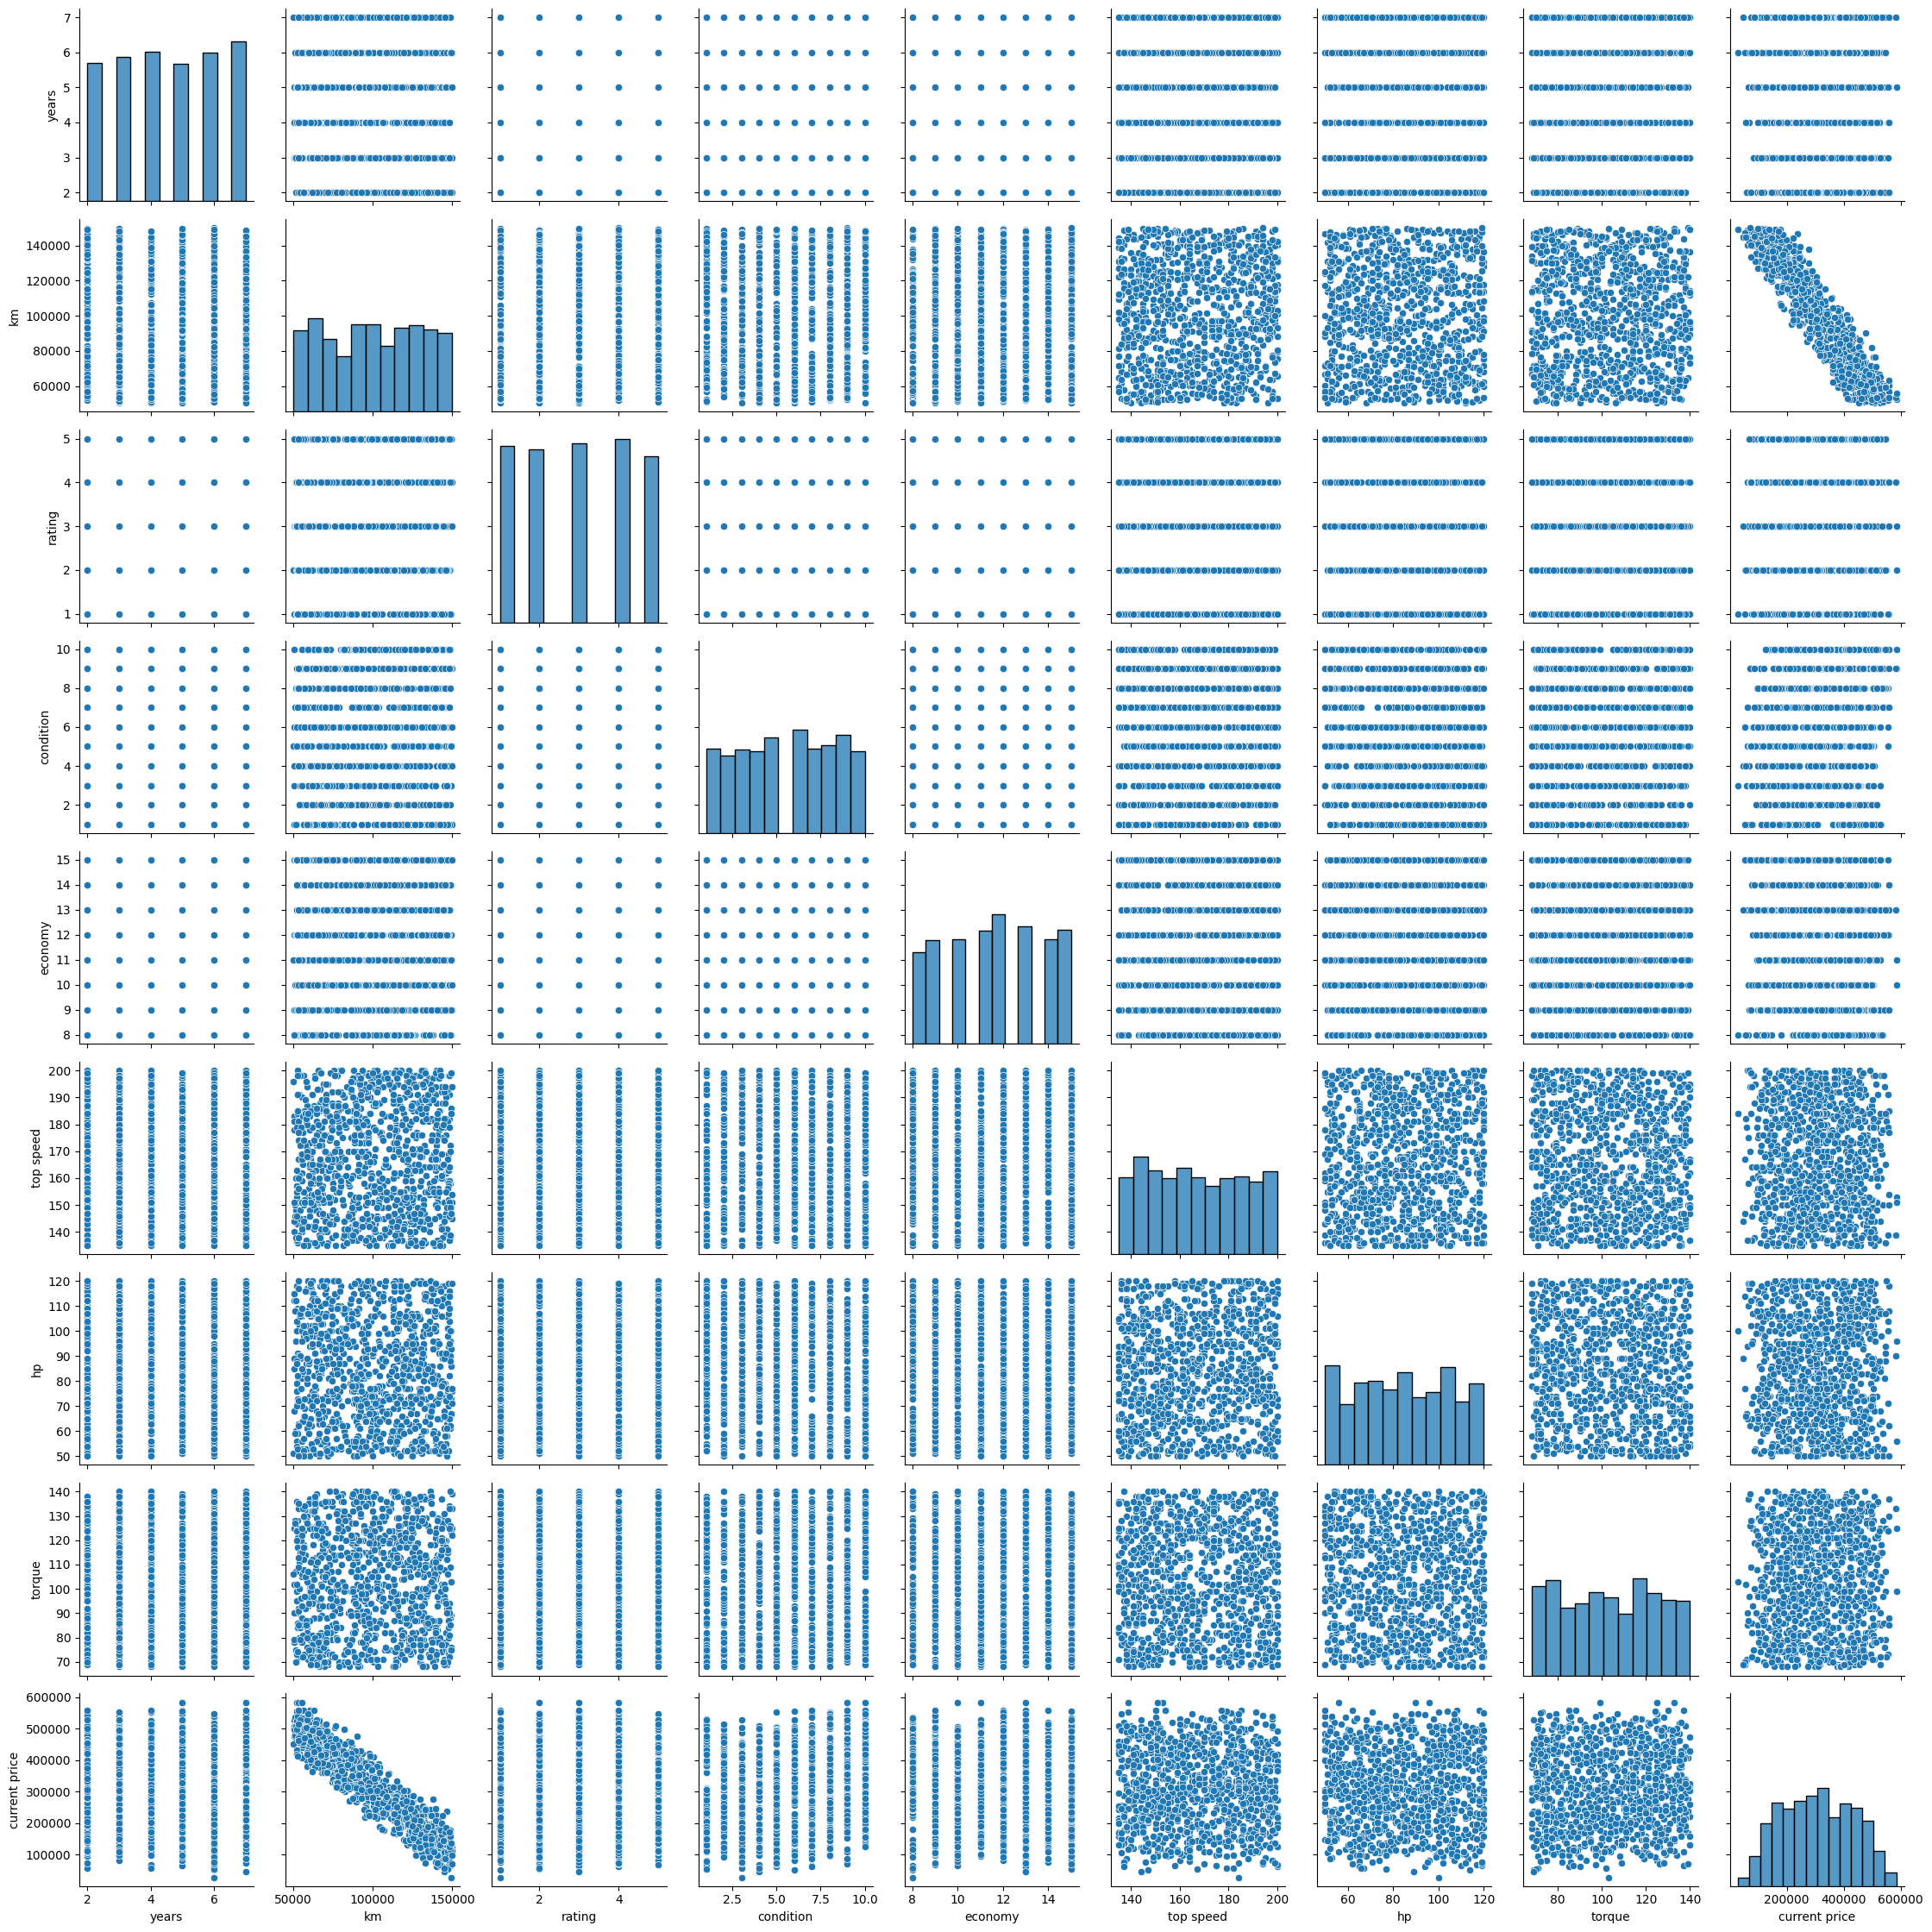

In [181]:
#visualize data
plt.figure(figsize=(5,4))
sns.pairplot(data=data)
plt.tight_layout()
plt.show()

In [183]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[3.000000e+00 7.894500e+04 1.000000e+00 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [6.000000e+00 1.172200e+05 5.000000e+00 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [2.000000e+00 1.325380e+05 2.000000e+00 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [7.000000e+00 8.672200e+04 1.000000e+00 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [2.000000e+00 1.404780e+05 4.000000e+00 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [5.000000e+00 6.729500e+04 4.000000e+00 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 9), dtype=float32)


#### Shuffle data

In [188]:
#shuffle the data to avoid model bias
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[7.000000e+00 8.352400e+04 2.000000e+00 8.000000e+00 1.300000e+01
  1.940000e+02 9.700000e+01 1.140000e+02 4.241075e+05]
 [2.000000e+00 1.152410e+05 4.000000e+00 8.000000e+00 1.500000e+01
  1.970000e+02 1.010000e+02 1.140000e+02 3.345020e+05]
 [7.000000e+00 9.524600e+04 4.000000e+00 2.000000e+00 8.000000e+00
  1.930000e+02 7.500000e+01 8.500000e+01 3.083765e+05]
 [3.000000e+00 7.630600e+04 2.000000e+00 3.000000e+00 1.300000e+01
  1.610000e+02 8.500000e+01 1.120000e+02 3.289735e+05]
 [3.000000e+00 7.636300e+04 4.000000e+00 8.000000e+00 8.000000e+00
  1.520000e+02 1.150000e+02 8.400000e+01 5.036065e+05]], shape=(5, 9), dtype=float32)


In [185]:
X = tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[  8.  13. 155. 106.  79.]
 [  5.  15. 173.  74. 119.]
 [  9.  14. 170. 104.  90.]
 [ 10.  15. 191.  52. 106.]
 [  5.  15. 189.  89. 109.]], shape=(5, 5), dtype=float32)


In [186]:
y = tensor_data[:,-1]
print(y[:5].shape)
y = tf.expand_dims(y, axis = -1)
print(y[:5])

(5,)
tf.Tensor(
[[211528.5]
 [275670. ]
 [405950. ]
 [184571. ]
 [423584. ]], shape=(5, 1), dtype=float32)


In [189]:
type(tensor_data)

tensorflow.python.framework.ops.EagerTensor

In [190]:
#compare to data
print(tensor_data[:5])
print(data[:5])

tf.Tensor(
[[7.000000e+00 8.352400e+04 2.000000e+00 8.000000e+00 1.300000e+01
  1.940000e+02 9.700000e+01 1.140000e+02 4.241075e+05]
 [2.000000e+00 1.152410e+05 4.000000e+00 8.000000e+00 1.500000e+01
  1.970000e+02 1.010000e+02 1.140000e+02 3.345020e+05]
 [7.000000e+00 9.524600e+04 4.000000e+00 2.000000e+00 8.000000e+00
  1.930000e+02 7.500000e+01 8.500000e+01 3.083765e+05]
 [3.000000e+00 7.630600e+04 2.000000e+00 3.000000e+00 1.300000e+01
  1.610000e+02 8.500000e+01 1.120000e+02 3.289735e+05]
 [3.000000e+00 7.636300e+04 4.000000e+00 8.000000e+00 8.000000e+00
  1.520000e+02 1.150000e+02 8.400000e+01 5.036065e+05]], shape=(5, 9), dtype=float32)
   years      km  rating  condition  economy  top speed  hp  torque  \
0      3   78945       1          2       14        177  73     123   
1      6  117220       5          9        9        148  74      95   
2      2  132538       2          8       15        181  53      97   
3      4  101065       4          3       11        197  54     

In [191]:
# Separate independent variables (features)
X = tensor_data[:, :-1]  # Select all rows, all columns except the last one

# Separate the target variable (label)
y = tensor_data[:, -1]  # Select all rows, only the last column
#reshape y be 2 dimensional
y=tf.expand_dims(y,-1)

* simpler way to reshape y to 2d:
* y = shuffled_data[:, -1:] # just add this collan at end

In [192]:
#review shape
print(X.shape,y.shape)

(1000, 8) (1000, 1)


# Split the data

In [195]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [196]:
X_train=X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train=y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [197]:
train_dataset=tf.data.Dataset.from_tensor_slices((X_train,y_train))
train_dataset=train_dataset.shuffle(buffer_size=8,
                                    reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [198]:
for X,y in train_dataset:
  print(X,y)
  break

tf.Tensor(
[[3.00000e+00 7.63630e+04 4.00000e+00 8.00000e+00 8.00000e+00 1.52000e+02
  1.15000e+02 8.40000e+01]
 [3.00000e+00 8.68380e+04 1.00000e+00 7.00000e+00 1.10000e+01 1.81000e+02
  9.60000e+01 1.19000e+02]
 [2.00000e+00 1.15241e+05 4.00000e+00 8.00000e+00 1.50000e+01 1.97000e+02
  1.01000e+02 1.14000e+02]
 [3.00000e+00 7.63060e+04 2.00000e+00 3.00000e+00 1.30000e+01 1.61000e+02
  8.50000e+01 1.12000e+02]
 [3.00000e+00 1.04178e+05 2.00000e+00 2.00000e+00 1.40000e+01 1.56000e+02
  9.40000e+01 8.60000e+01]
 [2.00000e+00 6.22600e+04 1.00000e+00 9.00000e+00 8.00000e+00 1.49000e+02
  1.07000e+02 7.10000e+01]
 [7.00000e+00 9.52460e+04 4.00000e+00 2.00000e+00 8.00000e+00 1.93000e+02
  7.50000e+01 8.50000e+01]
 [4.00000e+00 7.80600e+04 5.00000e+00 2.00000e+00 1.00000e+01 1.87000e+02
  1.20000e+02 1.07000e+02]
 [7.00000e+00 8.35240e+04 2.00000e+00 8.00000e+00 1.30000e+01 1.94000e+02
  9.70000e+01 1.14000e+02]
 [7.00000e+00 6.11160e+04 2.00000e+00 1.00000e+01 1.20000e+01 1.85000e+02
  6.50

In [199]:
X_val =X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val =y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(0, 8)
(0, 1)


In [200]:
val_dataset=tf.data.Dataset.from_tensor_slices((X_val,y_val))
val_dataset=val_dataset.shuffle(buffer_size=8,
                                    reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [202]:
X_test=X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test=y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)


(0, 8)
(0, 1)


In [203]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8,
                                     reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

#### Standardize data
* we want the data to have mean=0 and std=1

In [204]:
# Step 1: Initialize the normalizer
# This will help scale the dataset by adjusting each column separately.
# axis=-1 means we will normalize column-wise (each column gets its own mean & variance).
normalizer = Normalization(axis=-1)

# Step 2: Compute mean and standard deviation for each column in X
# The normalizer "learns" the mean and variance from X so it can later standardize new data in the same way.
normalizer.adapt(X_train)

# Step 3: Normalize X using the computed mean and variance
# Each value in X is transformed: (value - mean) / standard deviation
# This ensures that all columns have a mean of 0 and a standard deviation of 1.
X_normalized=normalizer(X_train)[:5]


In [205]:
print(X_normalized)

tf.Tensor(
[[ 1.403779   -0.57014906 -0.7210882   0.84398085  0.6307433   1.3802651
   0.5977939   0.48215133]
 [-1.4566977   0.52091515  0.713913    0.84398085  1.5222533   1.5360512
   0.7916468   0.48215133]
 [ 1.403779   -0.16691247  0.713913   -1.2870599  -1.5980316   1.3283364
  -0.46839714 -0.91034317]
 [-0.88460237 -0.8184481  -0.7210882  -0.93188643  0.6307433  -0.3333822
   0.01623514  0.38611722]
 [-0.88460237 -0.8164873   0.713913    0.84398085 -1.5980316  -0.80074054
   1.470132   -0.9583602 ]], shape=(5, 8), dtype=float32)


In [206]:
# Assume X is your dataset (NumPy array or Tensor)
num_features = X.shape[1]

*  we dnt normalize y

In [207]:
from tensorflow.keras import backend as K
# Clear the previous session to reset layer count
K.clear_session()

In [227]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [225]:
# #instantiate the model
# model=tf.keras.Sequential()
# model.add(normalizer)
# model.add(Dense(1))


# # Force model to build dynamically
# model.build(input_shape=(None, X.shape[1]))

# # Print model summary
# model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

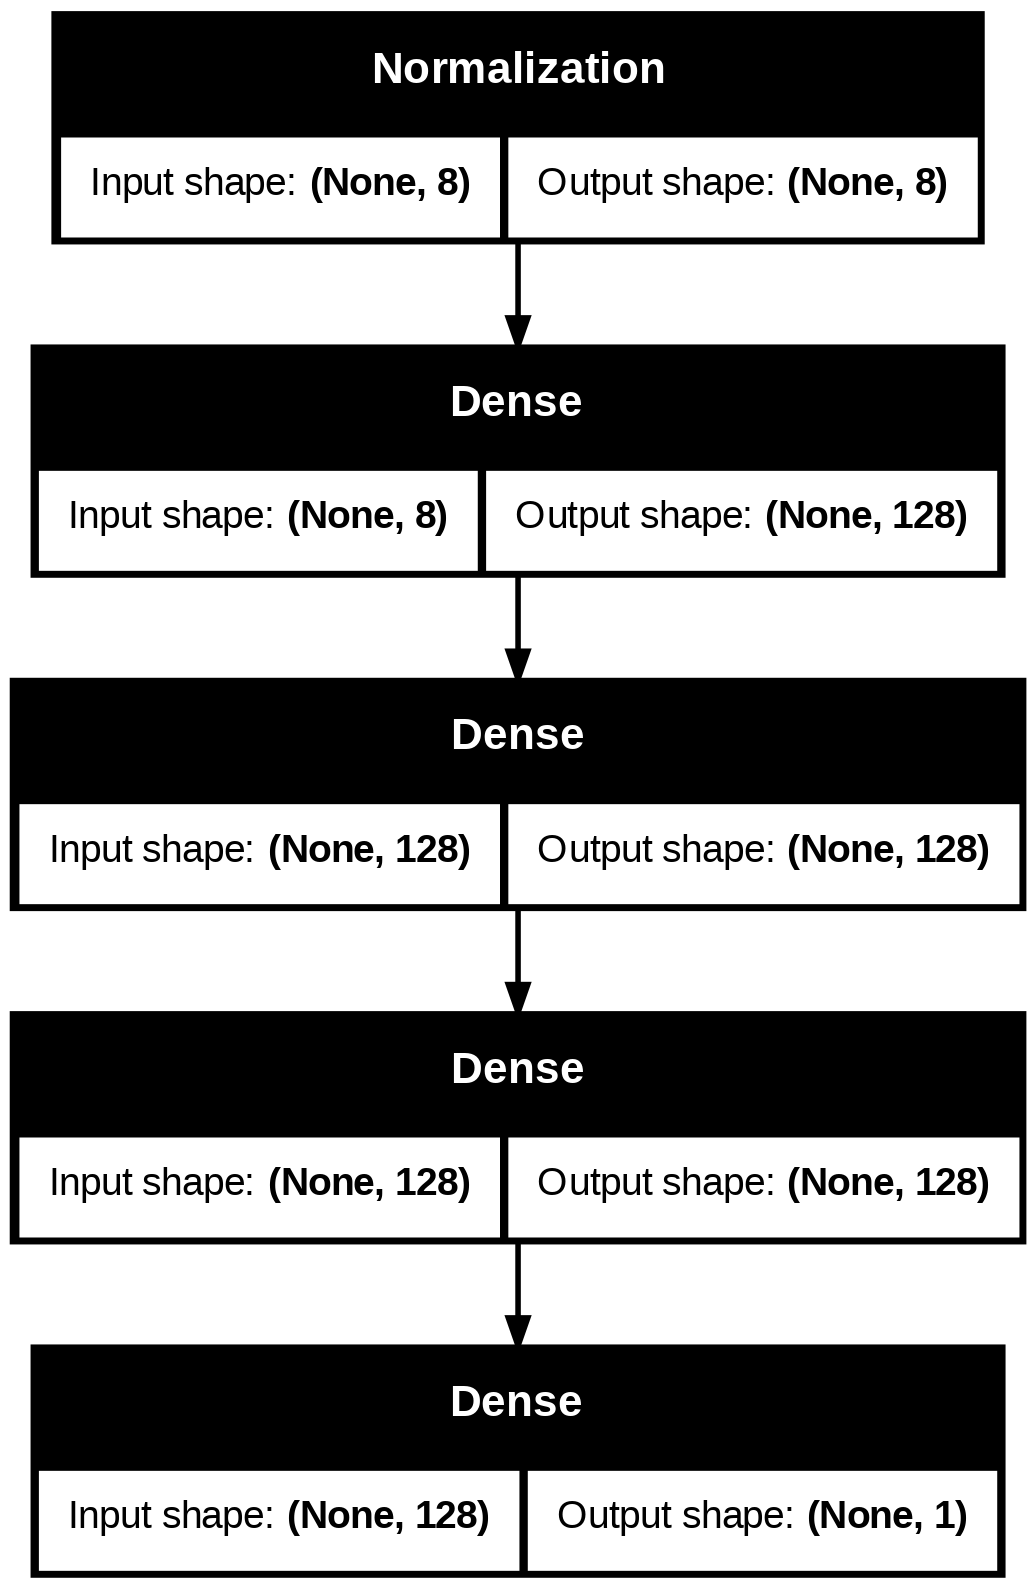

In [228]:
#plot the model
tf.keras.utils.plot_model(
    model,
    to_file="my-first-model.png",
    show_shapes=True
)

In [230]:
#compile the model
# add adam optimizer
#add performance metrics
model.compile(optimizer=Adam(learning_rate=0.1),
    loss=MeanAbsoluteError(),
    metrics=[RootMeanSquaredError()])

In [231]:
X.shape

TensorShape([32, 8])

In [232]:
y.shape

TensorShape([32, 1])

In [246]:
#fit the model

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val,y_val),
                    epochs = 100,
                    verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4847.5156 - root_mean_squared_error: 6365.0244
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6111.7363 - root_mean_squared_error: 7795.6943
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5575.5630 - root_mean_squared_error: 7143.3188
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4991.0581 - root_mean_squared_error: 6427.5259
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4084.0432 - root_mean_squared_error: 5325.6338
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4210.0566 - root_mean_squared_error: 5344.8389
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4598.7622 - root_mean_squared_error: 6157.4741
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4815.1450 - root_mean_squared_error: 6333.2891
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5276.7563 - root_mean_squared_error: 7091.3384
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms

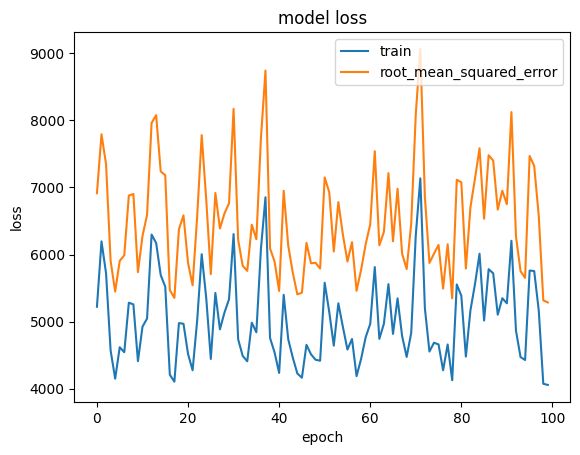

In [247]:
plt.plot(history.history['loss'])
plt.plot(history.history['root_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'root_mean_squared_error'])
plt.show()

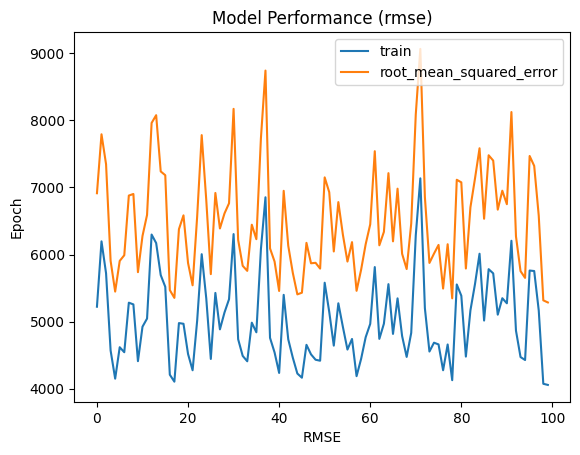

In [248]:
#plot the losses
plt.plot(history.history["loss"])
plt.plot(history.history["root_mean_squared_error"])
plt.title("Model Performance (rmse)")
plt.xlabel("RMSE")
plt.ylabel("Epoch")
plt.legend(["train","root_mean_squared_error"])
plt.show()


In [249]:
model.evaluate(X_val,y_val)

ValueError: math domain error